In [1]:
import pickle

In [2]:
with open("../data/nonpsychotic_posts.pickle", "rb") as p:
    nonpsychotic_posts = pickle.load(p)

In [3]:
len(list(nonpsychotic_posts.items())[0][1])

21

In [4]:
nonpsychotic_sample = list(nonpsychotic_posts.items())[0][1][10]["text"].lower()

In [5]:
print(nonpsychotic_sample)

if it is a voluntary hierarchy then it doesn't have to be useful. all of the participants have to agree to be a part of and follow it. anarchism is all about "contracts", and consent.

if you are a muslim by your own will then the hierarchy of your religion is not inherently antagonistic with anarchism.


In [6]:
import os
import stanza
from stanza.server import CoreNLPClient

/home/rain/Documents/GRIS/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
os.environ["CORENLP_HOME"] = "/home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0"

In [8]:
client = CoreNLPClient(timeout=150000000, be_quiet=True, annotators=['openie'], endpoint='http://localhost:1234')
client.start()
doc = client.annotate(nonpsychotic_sample, output_format="json")
triples = []
for sentence in doc['sentences']:
    for triple in sentence['openie']:
        triples.append({
           'subject': triple['subject'],
           'relation': triple['relation'],
            'object': triple['object']
        })
client.stop()

2022-07-31 16:55:23 INFO: Writing properties to tmp file: corenlp_server-18be9a43cb2a4028.props
2022-07-31 16:55:23 INFO: Starting server with command: java -Xmx5G -cp /home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 1234 -timeout 150000000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-18be9a43cb2a4028.props -annotators openie -preload -outputFormat serialized


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
g = nx.DiGraph()
for triplet in triples:
    g.add_edge(triplet["subject"], triplet["object"], relation=triplet["relation"])

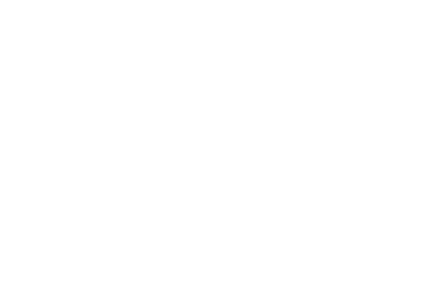

In [11]:
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues)

In [11]:
g.nodes

NodeView(())

In [12]:
g.edges

OutEdgeView([])

In [13]:
for relation in g.edges.data("relation"):
    print(relation)

In [14]:
nx.node_connectivity(g)

NetworkXPointlessConcept: Connectivity is undefined for the null graph.

In [ ]:
nx.number_connected_components(g.to_undirected())

3

In [ ]:
nx.number_strongly_connected_components(g)

7

In [ ]:
nx.number_weakly_connected_components(g)

3

In [ ]:
degree_centrality = nx.degree_centrality(g)
for k, v in degree_centrality.items():
    print(f"{k}: {v}")

rotation: 0.16666666666666666
them: 0.16666666666666666
they: 0.3333333333333333
stresses: 0.16666666666666666
stresses of turning: 0.16666666666666666
alignment: 0.16666666666666666
it: 0.16666666666666666


In [ ]:
avg_degree_centrality = sum(list(degree_centrality.values())) / len(list(degree_centrality.values()))
print(f"Average degree centrality: {avg_degree_centrality}")

Average degree centrality: 0.19047619047619047


In [ ]:
in_degree_centrality = nx.in_degree_centrality(g)
for k, v in in_degree_centrality.items():
    print(f"{k}: {v}")

rotation: 0.0
them: 0.16666666666666666
they: 0.0
stresses: 0.16666666666666666
stresses of turning: 0.16666666666666666
alignment: 0.0
it: 0.16666666666666666


In [ ]:
avg_in_degree_centrality = sum(list(in_degree_centrality.values())) / len(list(in_degree_centrality.values()))
print(f"Average in degree centrality: {avg_in_degree_centrality}")

Average in degree centrality: 0.09523809523809523


In [ ]:
out_degree_centrality = nx.out_degree_centrality(g)
for k, v in out_degree_centrality.items():
    print(f"{k}: {v}")

rotation: 0.16666666666666666
them: 0.0
they: 0.3333333333333333
stresses: 0.0
stresses of turning: 0.0
alignment: 0.16666666666666666
it: 0.0


In [ ]:
avg_out_degree_centrality = sum(list(out_degree_centrality.values())) / len(list(out_degree_centrality.values()))
print(f"Average out degree centrality: {avg_out_degree_centrality}")

Average out degree centrality: 0.09523809523809523


In [ ]:
eigen = nx.eigenvector_centrality(g, max_iter=2000)
for k, v in eigen.items():
    print(f"{k}: {v}")

rotation: 0.001077584329974678
them: 0.49999912910825034
they: 0.001077584329974678
stresses: 0.49999912910825034
stresses of turning: 0.49999912910825034
alignment: 0.001077584329974678
it: 0.49999912910825034


In [ ]:
avg_eigen = sum(list(eigen.values())) / len(list(eigen.values()))
print(f"Average eigenvector centrality: {avg_eigen}")

Average eigenvector centrality: 0.2861756099175608


In [ ]:
closeness_centrality = nx.closeness_centrality(g)
for k, v in closeness_centrality.items():
    print(f"{k}: {v}")

rotation: 0.0
them: 0.16666666666666666
they: 0.0
stresses: 0.16666666666666666
stresses of turning: 0.16666666666666666
alignment: 0.0
it: 0.16666666666666666


In [ ]:
avg_closeness_centrality = sum(list(closeness_centrality.values())) / len(list(closeness_centrality.values()))
print(f"Average closeness centrality: {avg_closeness_centrality}")

Average closeness centrality: 0.09523809523809523
